In [97]:
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# 랜덤시드 고정시키기
np.random.seed(3)

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/D/20200111_113051.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets/D', save_prefix='tri', save_format='png'):
    i += 1
    if i > 100: 
        break

In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/d.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets', save_prefix='tri', save_format='png'):
    i += 1
    if i > 5: 
        break

In [63]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/test/bottletype3/bottle030.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets/test/bottletype3', save_prefix='tri', save_format='png'):
    i += 1
    if i > 20: 
        break
        


In [47]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

img = load_img('DataSets/train/bottletype3/bottle015.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in train_datagen.flow(x, batch_size=1, save_to_dir='DataSets/train/bottletype3', save_prefix='tri', save_format='png'):
    i += 1
    if i > 100: 
        break

In [98]:
train_generator = train_datagen.flow_from_directory(
        'DataSets/train',
        target_size=(24, 24),
        batch_size=3,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'DataSets/test',
        target_size=(24, 24),    
        batch_size=3,
        class_mode='categorical')

Found 1488 images belonging to 3 classes.
Found 329 images belonging to 3 classes.


In [99]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(24,24,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

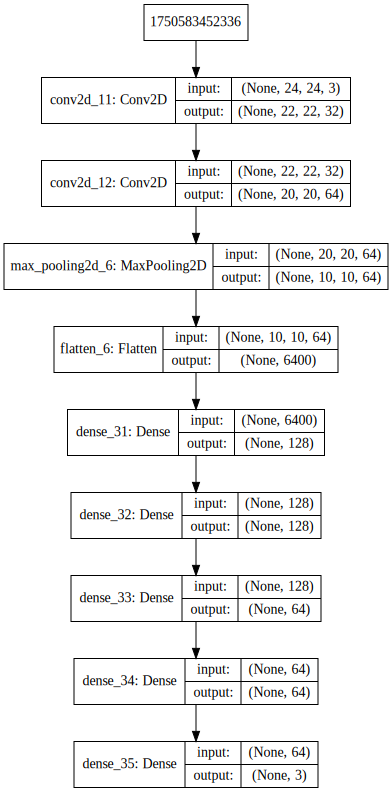

In [100]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [107]:
early_stopping = EarlyStopping(monitor='val_loss', verbose=1)

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
tb_hist = keras.callbacks.TensorBoard(log_dir='DataSets/graph', histogram_freq=0, write_graph=True, write_images=True)

keras.callbacks.TensorBoard(log_dir='DataSets/graph', histogram_freq=0, batch_size=3, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

In [118]:
model.fit_generator(
        train_generator,
        steps_per_epoch=15 * 100,
        epochs=50,
        validation_data=test_generator,
        validation_steps=5,
        callbacks=[early_stopping, tb_hist])

Epoch 1/50
1500/1500 [==============================] - 28s 19ms/step - loss: 0.4122 - acc: 0.7989 - val_loss: 0.2159 - val_acc: 0.9333
Epoch 2/50
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2614 - acc: 0.8889 - val_loss: 0.0629 - val_acc: 1.0000
Epoch 3/50
1500/1500 [==============================] - 29s 19ms/step - loss: 0.1403 - acc: 0.9471 - val_loss: 0.0148 - val_acc: 1.0000
Epoch 4/50
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0722 - acc: 0.9727 - val_loss: 0.2326 - val_acc: 0.9333
Epoch 00004: early stopping


In [119]:
print("-- Evaluate --")
scores = model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
acc: 92.86%


In [120]:
print("-- Predict --")
output = model.predict_generator(test_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output)

-- Predict --
{'bottletype1': 0, 'bottletype2': 1, 'bottletype3': 2}
[[0.000 1.000 0.000]
 [0.000 0.988 0.012]
 [0.000 0.001 0.999]
 [0.000 0.001 0.999]
 [0.000 1.000 0.000]
 [0.000 1.000 0.000]
 [0.000 0.431 0.569]
 [0.996 0.000 0.004]
 [0.000 0.207 0.793]
 [0.000 1.000 0.000]
 [0.998 0.000 0.002]
 [0.004 0.000 0.996]
 [0.000 1.000 0.000]
 [0.992 0.000 0.008]
 [0.000 1.000 0.000]]
